In [23]:
%pip install -U imbalanced-learn
#%pip install fairlearn
%pip install yellowbrick
%pip install dython
%ip install scikit-plot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import scipy 
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, multilabel_confusion_matrix, precision_recall_fscore_support, plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_det_curve
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC
from sklego.metrics import p_percent_score
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [25]:
refugee = pd.read_csv('1milrefugee_range_final_dataset.csv', index_col=0)

In [26]:
df = refugee.copy()

In [27]:
df.tail()

,language,education_level,last_occupation,predicted_employment_nation,mandatory_contribution_range
999995,Native + English,Undergrad,Junior DevOps Professional,UK,£1488 to £6448
999996,Native,Primary,Not employed,UK,£1250 and lower
999997,Native + English,No Education,Construction Worker,UK,£1250 and lower
999998,Native + English,Masters,Senior Administrative Assistant,UK,£1250 and lower
999999,Native + French,High School,Baker,France,£1250 and lower


In [33]:
df['mandatory_contribution_range'].value_counts()

£1250 and lower       731932
£8432 to £16864        91535
£1488 to £6448         69310
£16864 to £33728       53942
£6488 to £8432         31616
£33728 to £58776       13851
£1488                   2771
£58776 to £75640        2095
£92504 and greater      1807
£75640 to £92504        1141
Name: mandatory_contribution_range, dtype: int64

In [34]:
#Divide the data based on their catageory
target_variable = 'mandatory_contribution_range'
encode_variable = ['language', 'education_level', 'last_occupation', 'predicted_employment_nation']

In [85]:
#Measure of association
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['language',
 'education_level',
 'last_occupation',
 'predicted_employment_nation',
 'mandatory_contribution_range']

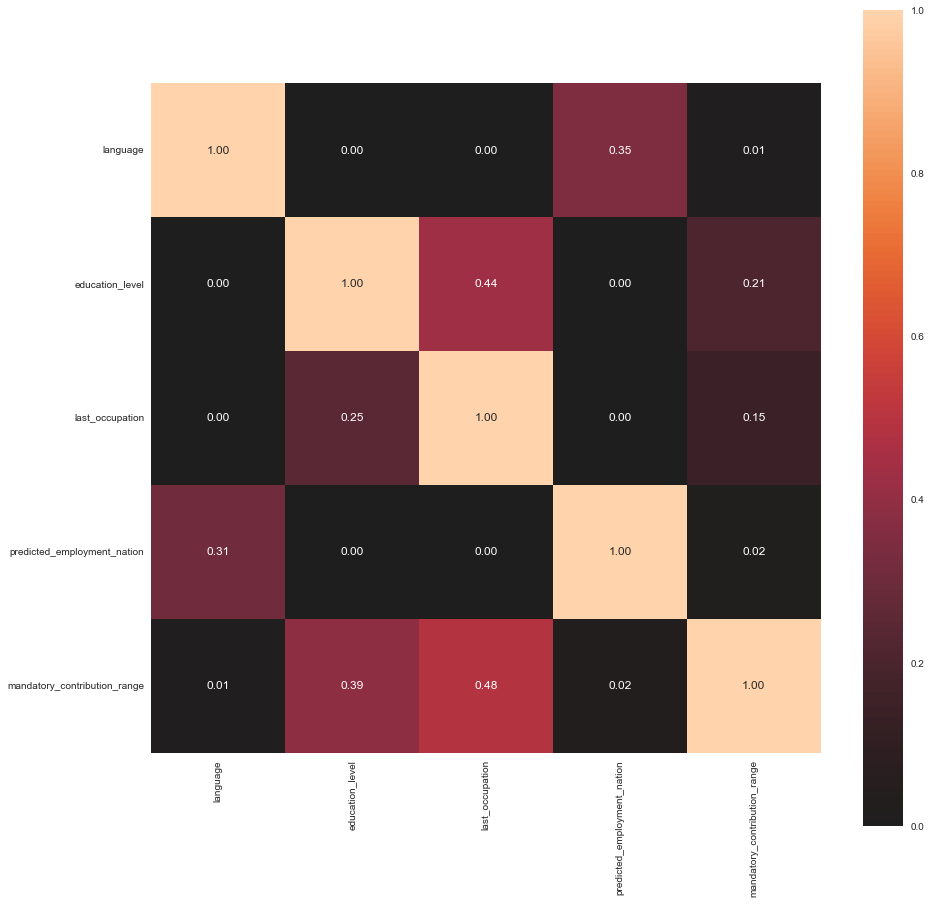

{'corr':                               language  education_level  last_occupation  \
 language                      1.000000         0.000006         0.000084   
 education_level               0.000004         1.000000         0.436449   
 last_occupation               0.000031         0.248150         1.000000   
 predicted_employment_nation   0.306445         0.000008         0.000078   
 mandatory_contribution_range  0.009853         0.390484         0.484534   
 
                               predicted_employment_nation  \
 language                                         0.346061   
 education_level                                  0.000006   
 last_occupation                                  0.000032   
 predicted_employment_nation                      1.000000   
 mandatory_contribution_range                     0.024464   
 
                               mandatory_contribution_range  
 language                                          0.008181  
 education_level              

In [86]:
associations(df, nom_nom_assoc='theil', figsize=(15, 15))

In [8]:
#OneHotEncoding for the features
for col in encode_variable:
    dummy_data = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_data], axis=1)
    del df[col]

In [9]:
#Label encoding for the feature to maintain the importance of the label values
mapping_target = {'£1250 and lower':0, '£1488':1, '£1488 to £6448':2, '£6488 to £8432':3, '£8432 to £16864':4, '£16864 to £33728':5, '£33728 to £58776':6, '£58776 to £75640':7, '£75640 to £92504':8, '£92504 and greater':9}
def encoded_target(val):
    return mapping_target[val]

In [10]:
#Joining the two encoded datasets into one
df['mandatory_contribution_range'] = df['mandatory_contribution_range'].apply(encoded_target)

In [11]:
#Dividing the new datset into X(features) and y(target-label) 
X = df.drop('mandatory_contribution_range', axis=1)
y = df['mandatory_contribution_range']

In [12]:
X.head()

,language_Native,language_Native + English,language_Native + English + French,language_Native + French,education_level_Associate Degree,education_level_High School,education_level_Masters,education_level_No Education,education_level_PhD,education_level_Primary,...,last_occupation_Senior Sales Professional,last_occupation_Senior Software Developer,last_occupation_Senior Software Developer-PhD,last_occupation_Senior University Lecturer,last_occupation_Senior Vet,last_occupation_SeniorPharmaceutical Professional,predicted_employment_nation_Canada,predicted_employment_nation_France,predicted_employment_nation_UK,predicted_employment_nation_US
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
y.value_counts()

0    731932
4     91535
2     69310
5     53942
3     31616
6     13851
1      2771
7      2095
9      1807
8      1141
Name: mandatory_contribution_range, dtype: int64

In [14]:
#Splitting the data before rescaling to reduce the chances of data leakage and overfitting
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Using random sampling instead of oversampling to reduce dataleakage, overfitting and duplicate data creation
from imblearn.under_sampling import RandomUnderSampler


#rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)
X_test_us, y_test_us = rus.fit_resample(X_test, y_test)

ax1 = y_train_us.value_counts().plot.pie(autopct='%.2f')
_1 = ax1.set_title("Under-sampling of y_train")
ax2 = y_test_us.value_counts().plot.pie(autopct='%.2f')
_2 = ax2.set_title("Under-sampling of y_test")

In [15]:
#Using robustscaler for outliers and also do the scaling after the split to prevent data lickage
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train_us)
X_train_r = scaler.transform(X_train_us)
X_test_r = scaler.transform(X_test_us)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train_s = sc.fit_transform(X_train_r)
#X_test_s = sc.transform(X_test_r)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#min_max=MinMaxScaler()
#min_max.fit(X_train_s)
#X_train_m = min_max.fit_transform(X_train_s)
#X_test_m = min_max.transform(X_test_s)

In [16]:
#Applying the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(X_train_r)
X_train_p = pca.transform(X_train_r)
X_test_p = pca.transform(X_test_r)

In [17]:
 #The number of PC used
 pca.n_components_ 

64

In [18]:
y_test_us.value_counts()

0    146162
4     18465
2     13853
5     10848
3      6292
6      2767
1       545
7       480
9       366
8       222
Name: mandatory_contribution_range, dtype: int64

In [ ]:
#Model-One vs Rest Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import matthews_corrcoef

#Making the model

#OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)
omv = OneVsRestClassifier(LinearSVC(max_iter=10000))
omv.fit(X_train_p, y_train_us)


#Predicting
y_train_pred = omv.predict(X_train_p) 
y_test_pred = omv.predict(X_test_p)

#Scoring
omv_train_acu = accuracy_score(y_train_us,y_train_pred)
omv_train_mcc = matthews_corrcoef(y_train_us, y_train_pred)

omv_test_acu = accuracy_score(y_test_us,y_test_pred)
omv_test_mcc = matthews_corrcoef(y_test_us, y_test_pred)


                   

print('Training Score')
print('- accuracy: %s' % omv_train_acu)
print('- matthews cofficient: %s' % omv_train_mcc)
print('Testing Score')
print('- accuracy: %s' % omv_test_acu)
print('- matthews cofficient: %s' % omv_test_mcc)

#Confusion Metrics
omv_cm = ConfusionMatrix(
    omv, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


omv_cm.fit(X_train_p, y_train_us)
omv_cm.score(X_test_p, y_test_us)
omv_cm.show()

print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))



#Multi-Class ROCAUC Curves
# Creating visualization with the readable labels
visualizer = ROCAUC(omv, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()



In [ ]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
#knn = KNeighborsClassifier()
knn.fit(X_train_p, y_train_us)
#Predicting
y_train_pred = knn.predict(X_train_p)
y_test_pred = knn.predict(X_test_p)
#Scoring
knn_mcc_train = matthews_corrcoef(y_train_us, y_train_pred)
knn_acc_train = accuracy_score(y_train_us,y_train_pred)

knn_mcc_test = matthews_corrcoef(y_test_us, y_test_pred)
knn_acc_test = accuracy_score(y_test_us,y_test_pred)

print('Training Score')
print('- matthews cofficient: %s' % knn_mcc_train)
print('- accuracy: %s' % knn_mcc_train)
print('Testing Score')
print('- matthews cofficient: %s' % knn_mcc_test)
print('- accuracy: %s' % knn_mcc_test)

#Confusion Metrics
knn_cm = ConfusionMatrix(
    knn, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


knn_cm.fit(X_train_p, y_train_us)
knn_cm.score(X_test_p, y_test_us)
knn_cm.show()

print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))

# Creating binary ROAUC visualization with the readable labels
visualizer = ROCAUC(knn, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()


Training Score
- accuracy: 0.6663925
- matthews cofficient: 0.3944893055428166
Testing Score
- accuracy: 0.66449
- matthews cofficient: 0.39321120300144663


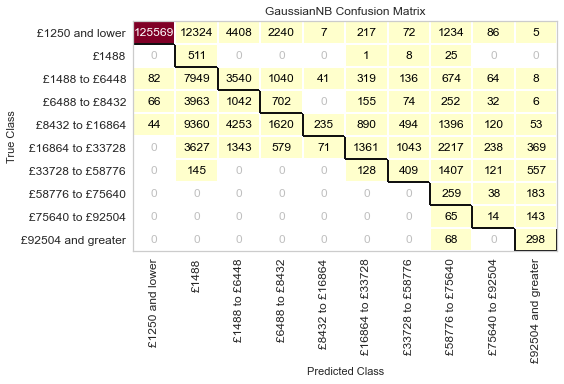

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    585770
           1       0.01      0.93      0.03      2226
           2       0.25      0.26      0.26     55457
           3       0.12      0.12      0.12     25324
           4       0.64      0.01      0.02     73070
           5       0.46      0.13      0.20     43094
           6       0.18      0.14      0.16     11084
           7       0.03      0.54      0.06      1615
           8       0.03      0.08      0.04       919
           9       0.17      0.79      0.28      1441

    accuracy                           0.67    800000
   macro avg       0.29      0.39      0.21    800000
weighted avg       0.84      0.67      0.71    800000

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    146162
           1       0.01      0.94      0.03       545
           2       0.24      0.26      0.25     13853
           3       0.11 

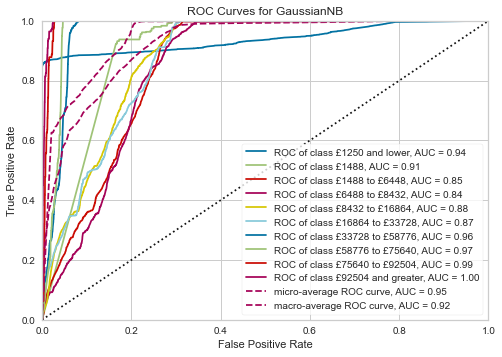

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [22]:
#Niave Bayes model
from sklearn.naive_bayes import GaussianNB

#Making the model
gnb = GaussianNB()
gnb.fit(X_train_p, y_train_us)

#Predicting
y_train_pred = gnb.predict(X_train_p) 
y_test_pred = gnb.predict(X_test_p)

#Scoring
gnb_train_acu = accuracy_score(y_train_us,y_train_pred)
gnb_train_mcc = matthews_corrcoef(y_train_us, y_train_pred)

gnb_test_acu = accuracy_score(y_test_us,y_test_pred)
gnb_test_mcc = matthews_corrcoef(y_test_us, y_test_pred)

print('Training Score')
print('- accuracy: %s' % gnb_train_acu)
print('- matthews cofficient: %s' % gnb_train_mcc)
print('Testing Score')
print('- accuracy: %s' % gnb_test_acu)
print('- matthews cofficient: %s' % gnb_test_mcc)

#Confusion Metrics
gnb_cm = ConfusionMatrix(
    gnb, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


gnb_cm.fit(X_train_p, y_train_us)
gnb_cm.score(X_test_p, y_test_us)
gnb_cm.show()

print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))

# Creating binary ROAUC visualization with the readable labels
visualizer = ROCAUC(gnb, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()

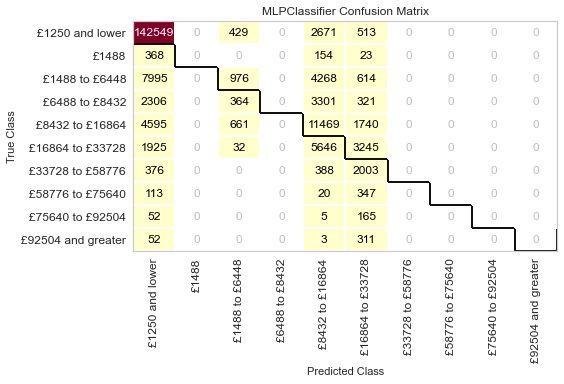

C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\ac

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    585770
           1       0.00      0.00      0.00      2226
           2       0.41      0.07      0.12     55457
           3       0.00      0.00      0.00     25324
           4       0.41      0.62      0.49     73070
           5       0.35      0.30      0.32     43094
           6       0.00      0.00      0.00     11084
           7       0.00      0.00      0.00      1615
           8       0.00      0.00      0.00       919
           9       0.00      0.00      0.00      1441

    accuracy                           0.79    800000
   macro avg       0.21      0.20      0.19    800000
weighted avg       0.74      0.79      0.75    800000



C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93    146162
           1       0.00      0.00      0.00       545
           2       0.40      0.07      0.12     13853
           3       0.00      0.00      0.00      6292
           4       0.41      0.62      0.49     18465
           5       0.35      0.30      0.32     10848
           6       0.00      0.00      0.00      2767
           7       0.00      0.00      0.00       480
           8       0.00      0.00      0.00       222
           9       0.00      0.00      0.00       366

    accuracy                           0.79    200000
   macro avg       0.20      0.20      0.19    200000
weighted avg       0.73      0.79      0.75    200000



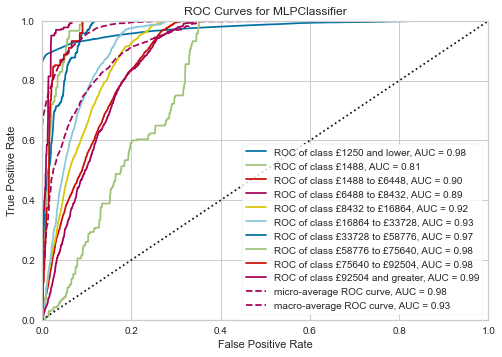

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [21]:
#MLP model
from sklearn.neural_network import MLPClassifier

#Making the model
mlp = MLPClassifier(alpha=1, max_iter=1000)
#mlp = MLPClassifier()
mlp.fit(X_train_p, y_train_us)

#Predicting
y_train_pred = mlp.predict(X_train_p) 
y_test_pred = mlp.predict(X_test_p)

#Scoring
mlp_train_acu = accuracy_score(y_train_us,y_train_pred)
mlp_train_mcc = matthews_corrcoef(y_train_us, y_train_pred)

mlp_test_acu = accuracy_score(y_test_us,y_test_pred)
mlp_test_mcc = matthews_corrcoef(y_test_us, y_test_pred)

#Confusion Metrics
mlp_cm = ConfusionMatrix(
    mlp, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


mlp_cm.fit(X_train_p, y_train_us)
mlp_cm.score(X_test_p, y_test_us)
mlp_cm.show()

print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))

# Creating binary ROAUC visualization with the readable labels
visualizer = ROCAUC(mlp, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()

Training Score
- accuracy: 0.8205
- matthews cofficient: 0.589639947905465
Testing Score
- accuracy: 0.81788
- matthews cofficient: 0.585110743571145


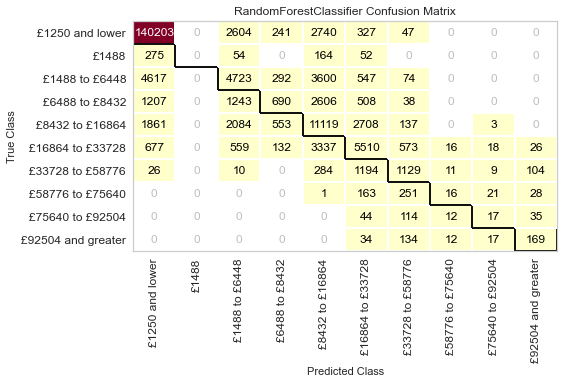

C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\ac

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    585770
           1       0.00      0.00      0.00      2226
           2       0.43      0.34      0.38     55457
           3       0.36      0.11      0.17     25324
           4       0.47      0.61      0.53     73070
           5       0.50      0.51      0.51     43094
           6       0.48      0.42      0.45     11084
           7       0.31      0.04      0.08      1615
           8       0.26      0.09      0.14       919
           9       0.44      0.44      0.44      1441

    accuracy                           0.82    800000
   macro avg       0.42      0.35      0.36    800000
weighted avg       0.81      0.82      0.81    800000



C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95    146162
           1       0.00      0.00      0.00       545
           2       0.42      0.34      0.38     13853
           3       0.36      0.11      0.17      6292
           4       0.47      0.60      0.53     18465
           5       0.50      0.51      0.50     10848
           6       0.45      0.41      0.43      2767
           7       0.24      0.03      0.06       480
           8       0.20      0.08      0.11       222
           9       0.47      0.46      0.46       366

    accuracy                           0.82    200000
   macro avg       0.40      0.35      0.36    200000
weighted avg       0.81      0.82      0.81    200000



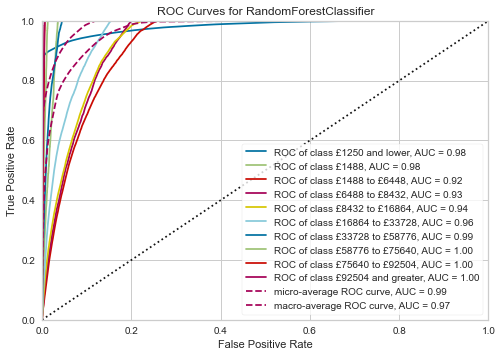

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [19]:
#Model1-RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
#Making the model
rf_c = RandomForestClassifier(n_estimators=200)
#rf_c = RandomForestClassifier()
rf_c.fit(X_train_p, y_train_us)

#Predicting
y_train_pred = rf_c.predict(X_train_p) 
y_test_pred = rf_c.predict(X_test_p)

#Scoring
rf_c_train_acu = accuracy_score(y_train_us,y_train_pred)
rf_c_train_mcc = matthews_corrcoef(y_train_us, y_train_pred)

rf_c_test_acu = accuracy_score(y_test_us,y_test_pred)
rf_c_test_mcc = matthews_corrcoef(y_test_us, y_test_pred)

print('Training Score')
print('- accuracy: %s' % rf_c_train_acu)
print('- matthews cofficient: %s' % rf_c_train_mcc)
print('Testing Score')
print('- accuracy: %s' % rf_c_test_acu)
print('- matthews cofficient: %s' % rf_c_test_mcc)

#Confusion Metrics
rf_c_cm = ConfusionMatrix(
    rf_c, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


rf_c_cm.fit(X_train_p, y_train_us)
rf_c_cm.score(X_test_p, y_test_us)
rf_c_cm.show()

print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))

#Multi-Class ROCAUC Curves
# Creating visualization with the readable labels
visualizer = ROCAUC(rf_c, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()



In [ ]:
#import joblib
#range_model = "range_main_model.pkl"
#joblib.dump(rf_c, range_model)

Training Score
- accuracy: 0.8205
- matthews cofficient: 0.5894382302879051
Testing Score
- accuracy: 0.817775
- matthews cofficient: 0.5846712231121821


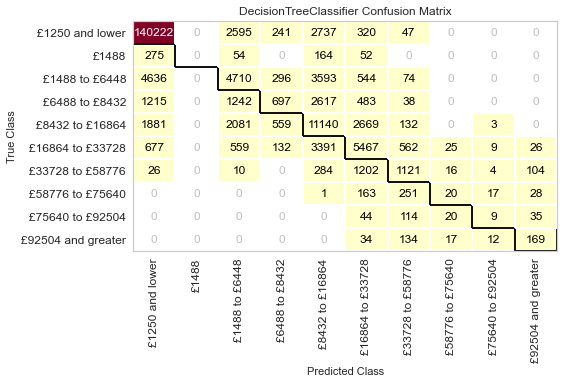

C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\ac

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    585770
           1       0.00      0.00      0.00      2226
           2       0.43      0.34      0.38     55457
           3       0.36      0.11      0.17     25324
           4       0.47      0.61      0.53     73070
           5       0.51      0.51      0.51     43094
           6       0.48      0.42      0.45     11084
           7       0.29      0.07      0.11      1615
           8       0.27      0.05      0.08       919
           9       0.44      0.44      0.44      1441

    accuracy                           0.82    800000
   macro avg       0.42      0.35      0.36    800000
weighted avg       0.81      0.82      0.81    800000



C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abirm\Envs\acceptance_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95    146162
           1       0.00      0.00      0.00       545
           2       0.42      0.34      0.38     13853
           3       0.36      0.11      0.17      6292
           4       0.47      0.60      0.53     18465
           5       0.50      0.50      0.50     10848
           6       0.45      0.41      0.43      2767
           7       0.20      0.04      0.07       480
           8       0.17      0.04      0.07       222
           9       0.47      0.46      0.46       366

    accuracy                           0.82    200000
   macro avg       0.40      0.35      0.35    200000
weighted avg       0.81      0.82      0.81    200000



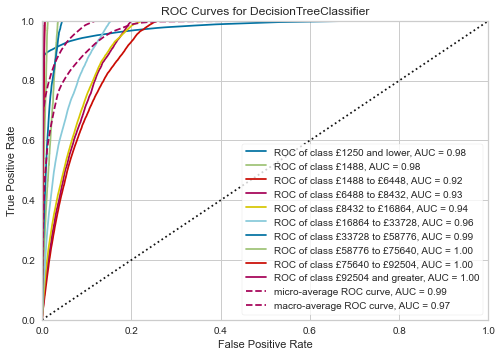

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
#Model2- DecissionTree Classifier 

from sklearn.tree import DecisionTreeClassifier
#Making the model
#dt = DecisionTreeClassifier(max_depth=5)
dt = DecisionTreeClassifier()
dt.fit(X_train_p, y_train_us)

#Predicting
y_train_pred = dt.predict(X_train_p) 
y_test_pred = dt.predict(X_test_p)

#Scoring
dt_train_acu = accuracy_score(y_train_us,y_train_pred)
dt_train_mcc = matthews_corrcoef(y_train_us, y_train_pred)

dt_test_acu = accuracy_score(y_test_us,y_test_pred)
dt_test_mcc = matthews_corrcoef(y_test_us, y_test_pred)

print('Training Score')
print('- accuracy: %s' % dt_train_acu)
print('- matthews cofficient: %s' % dt_train_mcc)
print('Testing Score')
print('- accuracy: %s' % dt_test_acu)
print('- matthews cofficient: %s' % dt_test_mcc)

#Confusion Metrics
dt_cm = ConfusionMatrix(
    dt, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


dt_cm.fit(X_train_p, y_train_us)
dt_cm.score(X_test_p, y_test_us)
dt_cm.show()

print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))

#Multi-Class ROCAUC Curves
# Creating visualization with the readable labels
visualizer = ROCAUC(dt, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()

In [ ]:
#Model3 - SupportVector Classifier

from sklearn.svm import SVC

#Making the model
svm_rbf = SVC(gamma=2, C=1)
#svm_rbf = SVC()
svm_rbf.fit(X_train_p, y_train_us)

#Predicting
y_train_pred = svm_rbf.predict(X_train_p) 
y_test_pred = svm_rbf.predict(X_test_p)

#Scoring
svm_rbf_train_acu = accuracy_score(y_train_us,y_train_pred)
svm_rbf_train_mcc = matthews_corrcoef(y_train_us, y_train_pred)

svm_rbf_test_acu = accuracy_score(y_test_us,y_test_pred)
svm_rbf_test_mcc = matthews_corrcoef(y_test_us, y_test_pred)

print('Training Score')
print('- accuracy: %s' % svm_rbf_train_acu)
print('- matthews cofficient: %s' % svm_rbf_train_mcc)
print('Testing Score')
print('- accuracy: %s' % svm_rbf_test_acu)
print('- matthews cofficient: %s' % svm_rbf_test_mcc)

#Confusion Metrics
svm_rbf_cm = ConfusionMatrix(
    svm_rbf, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


svm_rbf_cm.fit(X_train_p, y_train_us)
svm_rbf_cm.score(X_test_p, y_test_us)
svm_rbf_cm.show()

print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))
#Multi-Class ROCAUC Curves
# Creating visualization with the readable labels
visualizer = ROCAUC(svm_rbf, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()

In [ ]:
#The final(1) stacked model

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
              
              ('dt',dt),
              ('rf_c',rf_c)
]

#Making the model
stack_m = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(class_weight='balanced', penalty='elasticnet', solver='saga', max_iter=100000, multi_class='multinomial', l1_ratio=0.8)
)
stack_m.fit(X_train_p, y_train_us)

#Predicting
y_train_pred = stack_m.predict(X_train_p) 
y_test_pred = stack_m.predict(X_test_p)

#Scoring
stack_m_train_acu = accuracy_score(y_train_us,y_train_pred)
stack_m_train_mcc = matthews_corrcoef(y_train_us, y_train_pred)

stack_m_test_acu = accuracy_score(y_test_us,y_test_pred)
stack_m_test_mcc = matthews_corrcoef(y_test_us, y_test_pred)

print('Training Score')
print('- accuracy: %s' % stack_m_train_acu)
print('- matthews cofficient: %s' % stack_m_train_mcc)
print('Testing Score')
print('- accuracy: %s' % stack_m_test_acu)
print('- matthews cofficient: %s' % stack_m_test_mcc)

#Confusion Metrics
stack_m_cm = ConfusionMatrix(
    stack_m, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


stack_m_cm.fit(X_train_p, y_train_us)
stack_m_cm.score(X_test_p, y_test_us)
stack_m_cm.show()


print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))
#Multi-Class ROCAUC Curves
# Creating visualization with the readable labels
visualizer = ROCAUC(stack_m, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()

In [ ]:
#The final stacked model

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
              ('svm_rbf',svm_rbf),
              ('dt',dt),
              ('rf_c',rf_c),
]

#Making the model
stack_m = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(max_iter=100000)
)
stack_m.fit(X_train_p, y_train_us)

#Predicting
y_train_pred = stack_m.predict(X_train_p) 
y_test_pred = stack_m.predict(X_test_p)

#Scoring
stack_m_train_acu = accuracy_score(y_train_us,y_train_pred)
stack_m_train_mcc = matthews_corrcoef(y_train_us, y_train_pred)

stack_m_test_acu = accuracy_score(y_test_us,y_test_pred)
stack_m_test_mcc = matthews_corrcoef(y_test_us, y_test_pred)

print('Training Score')
print('- accuracy: %s' % stack_m_train_acu)
print('- matthews cofficient: %s' % stack_m_train_mcc)
print('Testing Score')
print('- accuracy: %s' % stack_m_test_acu)
print('- matthews cofficient: %s' % stack_m_test_mcc)

#Confusion Metrics
stack_m_cm = ConfusionMatrix(
    stack_m, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
    


stack_m_cm.fit(X_train_p, y_train_us)
stack_m_cm.score(X_test_p, y_test_us)
stack_m_cm.show()


print(classification_report(y_train_us, y_train_pred))
print(classification_report(y_test_us, y_test_pred))
#Multi-Class ROCAUC Curves
# Creating visualization with the readable labels
visualizer = ROCAUC(stack_m, classes = ['£1250 and lower', '£1488',
                                    '£1488 to £6448', '£6488 to £8432', 
                                    '£8432 to £16864', '£16864 to £33728', 
                                    '£33728 to £58776', '£58776 to £75640', '£75640 to £92504', '£92504 and greater'])
                    

                                        
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(X_train_p, y_train_us)
visualizer.score(X_test_p, y_test_us)
visualizer.show()